In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 9
})

In [2]:
results = pickle.load(open(f"data/sample_randSVD_benchmarks.pkl", "rb"))
title = 'Pentapeptide'
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

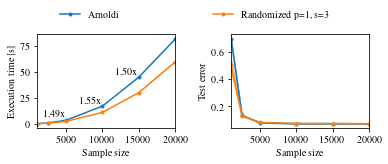

In [23]:
fig_width = 5.5 #Inches
fig_height = 2 #Inches

#Hardcoded
n_oversamples = results['n_oversamples']
iterated_power = results['iterated_power']

fig, axes = plt.subplots(ncols=2, figsize=(fig_width, fig_height))

#Plotting execution times
ax = axes[0]
solvers = results['solvers']
times_avg = results['measurements']['times']['means']
times_std = results['measurements']['times']['stds']
sample_sizes = results['iterated_array']
for solver_idx, solver in enumerate(solvers):
    if solver == 'randomized':
        label = solver.capitalize() + f" p={iterated_power}, s={n_oversamples}"
    else:
        label = solver.capitalize()
    
    ax.plot(sample_sizes, times_avg[solver_idx], '.-', label=label)
    ax.fill_between(sample_sizes, (times_avg - times_std)[solver_idx], (times_avg + times_std)[solver_idx], alpha=0.5)
    if solver ==  'arnoldi':
        for pt_idx, pt in enumerate(sample_sizes):
            multiplier = (times_avg[0]/times_avg[1])[pt_idx]
            if 1 < pt_idx < len(sample_sizes) - 1:
                ax.text(pt,3 + times_avg[solver_idx][pt_idx], f'{multiplier:.2f}x', ha='right')
ax.set_ylabel("Execution time [s]")
ax.set_xlabel("Sample size")
ax.set_xmargin(0)
#Plotting train and test errors
ax = axes[1]

training_errors_avg = results['measurements']['training_errors']['means']
training_errors_std = results['measurements']['training_errors']['stds']

test_errors_avg = results['measurements']['test_errors']['means']
test_errors_std = results['measurements']['test_errors']['stds']

for solver_idx, solver in enumerate(solvers):
    if solver == 'randomized':
        label = solver.capitalize() + f" p={iterated_power}, s={n_oversamples}"
    else:
        label = solver.capitalize()
    
    ax.plot(sample_sizes, test_errors_avg[solver_idx], '.-', color = cycle[solver_idx])
    ax.fill_between(sample_sizes, (test_errors_avg - test_errors_std)[solver_idx], (test_errors_avg + test_errors_std)[solver_idx], alpha=0.5, color = cycle[solver_idx])

ax.set_ylabel("Test error")
ax.set_xlabel("Sample size")
ax.set_xmargin(0)
#ax.set_yscale('log')

fig.legend(bbox_to_anchor=(0.15, 1, 0.7, 0.2), borderaxespad=0, loc='lower center', mode='expand', ncol=3, frameon=False)
plt.tight_layout()
fig.savefig("figs/randomizedSVD_pentapeptide_benchmarks.pdf",  bbox_inches='tight')
